In [78]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [79]:
df = pd.read_csv(r"C:\Users\HP\Desktop\winequality.csv",engine='python')

In [80]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [81]:
df.shape

(1599, 12)

In [82]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

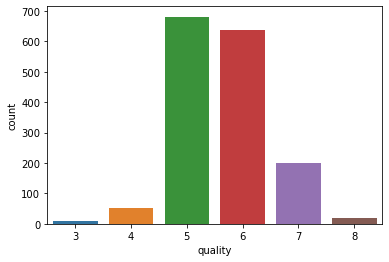

In [83]:
sns.countplot(x=df['quality'])

In [84]:
duplicate_rows_df = df[df.duplicated()]
print(" number of duplicate rows: ", duplicate_rows_df.shape )

 number of duplicate rows:  (240, 12)


In [85]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [86]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:xlabel='quality', ylabel='count'>

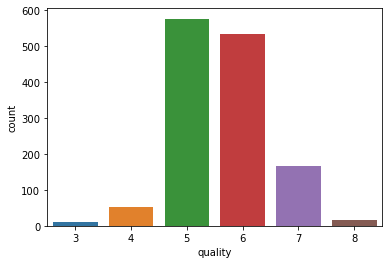

In [87]:
sns.countplot(x=df['quality'])

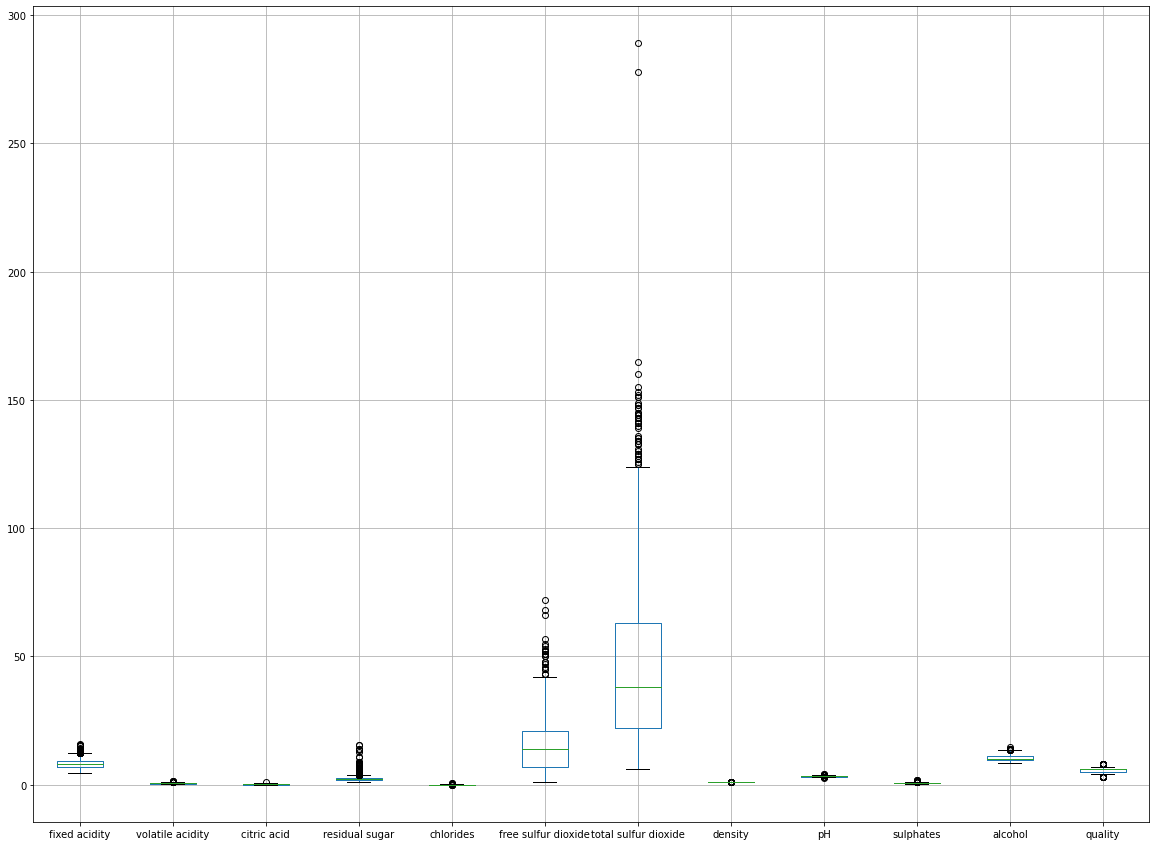

In [88]:
cols = df.columns.tolist()
#Checking for Detecting Outliers
plt.subplots(figsize=(20,15))
boxplot = df.boxplot(column=cols)

In [89]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

fixed acidity            2.10000
volatile acidity         0.25000
citric acid              0.34000
residual sugar           0.70000
chlorides                0.02100
free sulfur dioxide     14.00000
total sulfur dioxide    41.00000
density                  0.00222
pH                       0.19000
sulphates                0.18000
alcohol                  1.60000
quality                  1.00000
dtype: float64


In [90]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(1005, 12)

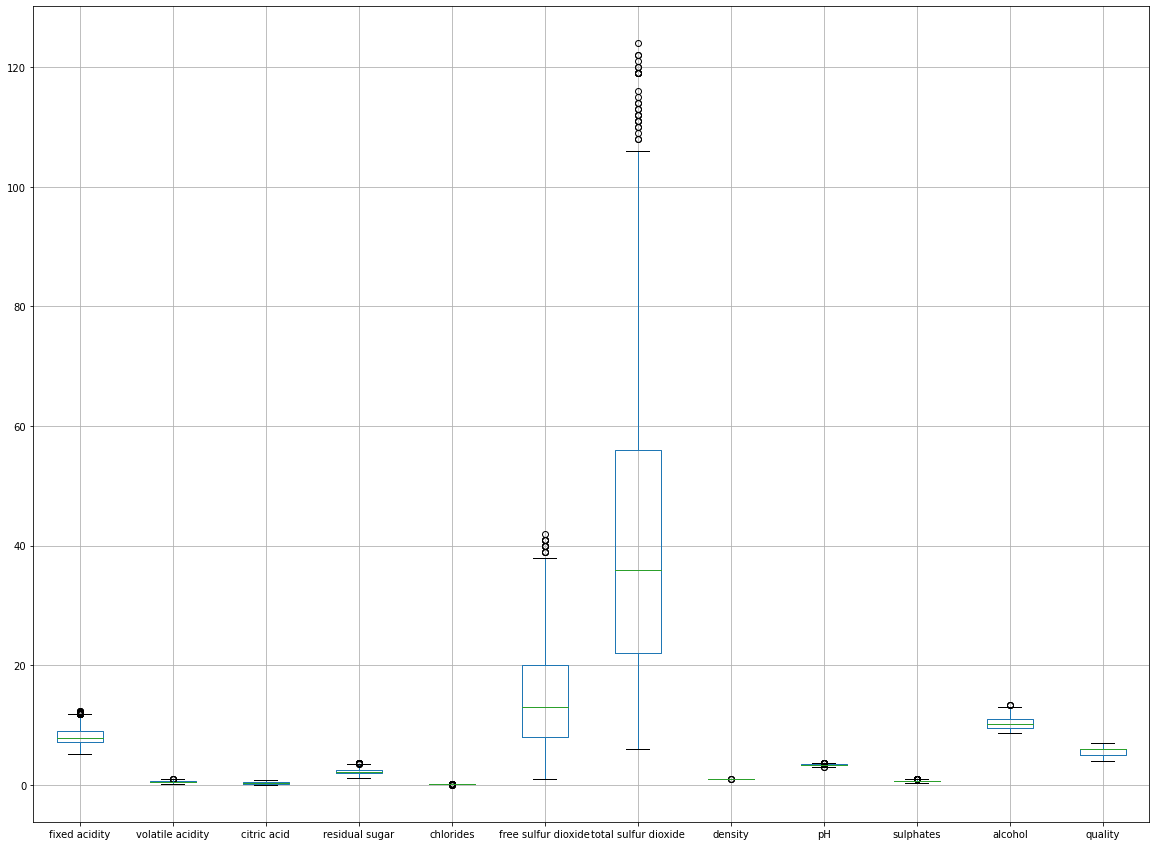

In [91]:
plt.subplots(figsize=(20,15))
boxplot = df.boxplot(column=cols)

In [92]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.282019,0.655777,0.239487,0.202368,-0.144925,-0.087810,0.610015,-0.692128,0.185839,-0.025770,0.121315
volatile acidity,-0.282019,1.000000,-0.621121,0.021976,0.124282,-0.018433,0.099376,0.043580,0.241762,-0.308814,-0.222085,-0.348293
citric acid,0.655777,-0.621121,1.000000,0.155535,0.065903,-0.067158,0.011869,0.289552,-0.477620,0.270070,0.152067,0.220871
residual sugar,0.239487,0.021976,0.155535,1.000000,0.259101,0.085180,0.186835,0.396153,-0.073672,0.053014,0.091426,0.013534
chlorides,0.202368,0.124282,0.065903,0.259101,1.000000,0.026697,0.181407,0.424603,-0.184797,-0.069210,-0.291450,-0.183684
free sulfur dioxide,-0.144925,-0.018433,-0.067158,0.085180,0.026697,1.000000,0.623980,-0.012027,0.119040,0.089043,-0.050641,-0.015978
total sulfur dioxide,-0.087810,0.099376,0.011869,0.186835,0.181407,0.623980,1.000000,0.150321,-0.010152,-0.060509,-0.265482,-0.208359
density,0.610015,0.043580,0.289552,0.396153,0.424603,-0.012027,0.150321,1.000000,-0.241898,0.091304,-0.538401,-0.215042
pH,-0.692128,0.241762,-0.477620,-0.073672,-0.184797,0.119040,-0.010152,-0.241898,1.000000,0.005097,0.118311,-0.061311
sulphates,0.185839,-0.308814,0.270070,0.053014,-0.069210,0.089043,-0.060509,0.091304,0.005097,1.000000,0.268061,0.418719


In [93]:
df.quality.value_counts()

5    434
6    423
7    115
4     33
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

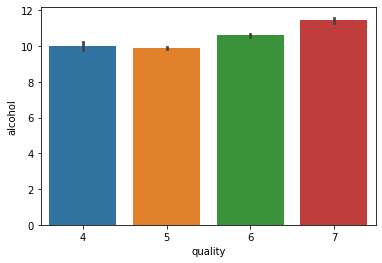

In [94]:
sns.barplot(x = 'quality', y = 'alcohol',data= df)

In [95]:
from sklearn.preprocessing import LabelEncoder

In [96]:
bins = (2, 5.5, 8)

group_names = ['bad', 'good']

df['quality'] = pd.cut(df['quality'], bins= bins, labels = group_names)

In [97]:
label_quality = LabelEncoder()



In [98]:
df['quality'] = label_quality.fit_transform(df['quality'])


In [99]:
df['quality'].value_counts()


1    538
0    467
Name: quality, dtype: int64

In [100]:
X = df.drop('quality', axis = 1)
y = df['quality']


In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


In [106]:

# determining the shapes of training and testing sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(703, 11)
(703,)
(302, 11)
(302,)


In [107]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [108]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [111]:
from sklearn.tree import DecisionTreeClassifier


In [112]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc.score(X_train,y_train)
preddtc=dtc.predict(X_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.6854304635761589
[[ 93  43]
 [ 52 114]]
              precision    recall  f1-score   support

           0       0.64      0.68      0.66       136
           1       0.73      0.69      0.71       166

    accuracy                           0.69       302
   macro avg       0.68      0.69      0.68       302
weighted avg       0.69      0.69      0.69       302



In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
model=LogisticRegression()

In [115]:
model.fit(X_train,y_train)

LogisticRegression()

In [116]:
model.score(X_test,y_test)

0.7185430463576159

In [117]:
lrg=LogisticRegression()
lrg.fit(X_train,y_train)
lrg.score(X_train,y_train)
predlrg=lrg.predict(X_test)
print(accuracy_score(y_test,predlrg))
print(confusion_matrix(y_test,predlrg))
print(classification_report(y_test,predlrg))

0.7185430463576159
[[ 99  37]
 [ 48 118]]
              precision    recall  f1-score   support

           0       0.67      0.73      0.70       136
           1       0.76      0.71      0.74       166

    accuracy                           0.72       302
   macro avg       0.72      0.72      0.72       302
weighted avg       0.72      0.72      0.72       302



In [122]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn.score(X_train,y_train)
predknn=knn.predict(X_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.7086092715231788
[[ 91  45]
 [ 43 123]]
              precision    recall  f1-score   support

           0       0.68      0.67      0.67       136
           1       0.73      0.74      0.74       166

    accuracy                           0.71       302
   macro avg       0.71      0.71      0.71       302
weighted avg       0.71      0.71      0.71       302



In [123]:
from sklearn.svm import SVC
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
svc.score(X_train,y_train)
predsvc=svc.predict(X_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7251655629139073
[[106  30]
 [ 53 113]]
              precision    recall  f1-score   support

           0       0.67      0.78      0.72       136
           1       0.79      0.68      0.73       166

    accuracy                           0.73       302
   macro avg       0.73      0.73      0.73       302
weighted avg       0.73      0.73      0.73       302



In [124]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(X_train,y_train)
    svc.score(X_train,y_train)
    predsvc=svc.predict(X_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))

In [125]:
svmkernel('rbf')

0.7251655629139073
[[100  36]
 [ 47 119]]
              precision    recall  f1-score   support

           0       0.68      0.74      0.71       136
           1       0.77      0.72      0.74       166

    accuracy                           0.73       302
   macro avg       0.72      0.73      0.72       302
weighted avg       0.73      0.73      0.73       302



In [127]:
# Predicted values
y_head_lrg = lrg.predict(X_test)
knn3 = KNeighborsClassifier(n_neighbors = 5)
knn3.fit(X_train, y_train)
y_head_knn = knn3.predict(X_test)
y_head_svc = svc.predict(X_test)

y_head_dtc = dtc.predict(X_test)

In [129]:
from sklearn.metrics import confusion_matrix

cm_lrg = confusion_matrix(y_test,y_head_lrg)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svc = confusion_matrix(y_test,y_head_svc)

cm_dtc = confusion_matrix(y_test,y_head_dtc)

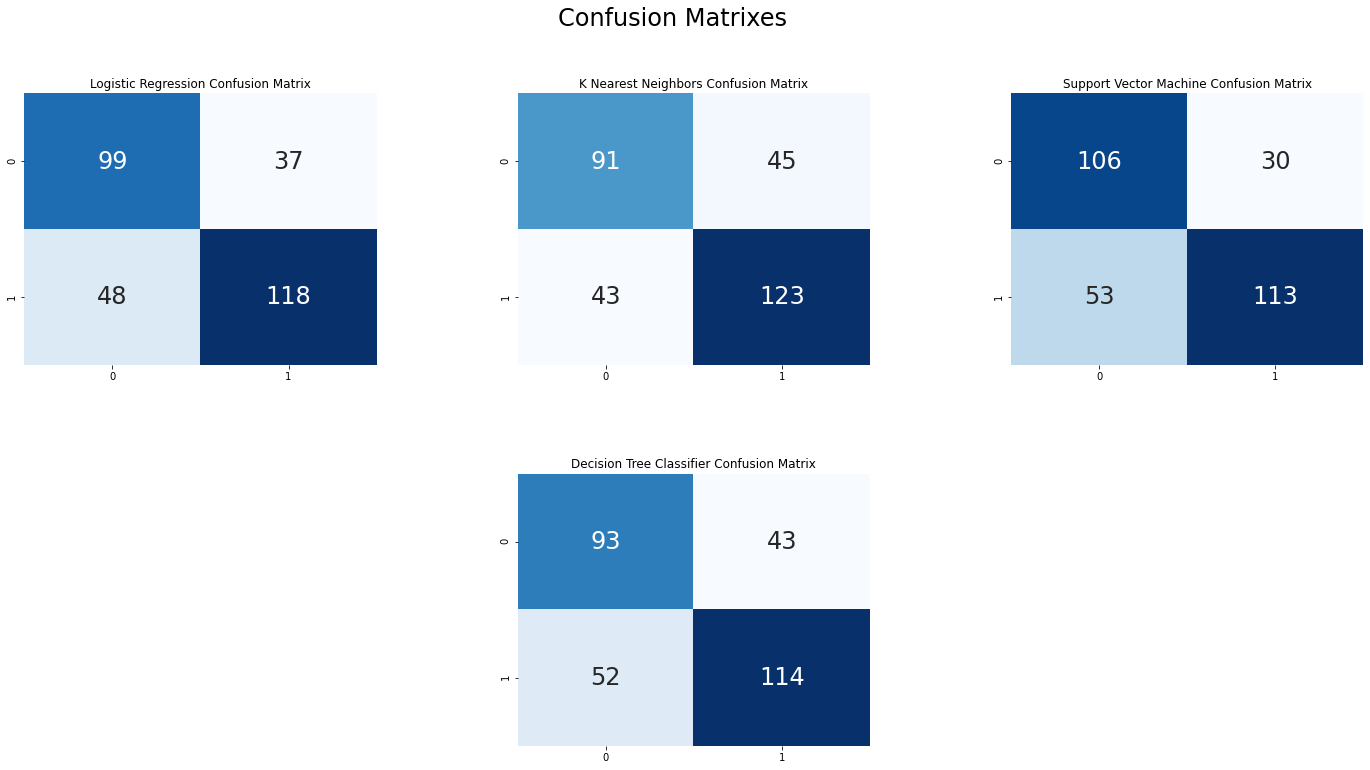

In [130]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lrg,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

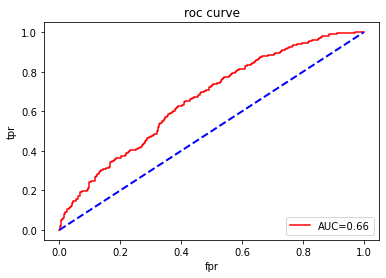

In [133]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
preds=lrg.predict_proba(X)[:,1]
fpr,tpr,thershold=roc_curve(y,preds,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,'r',label='AUC=%0.2f'% roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.legend(loc='lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')
plt.show()

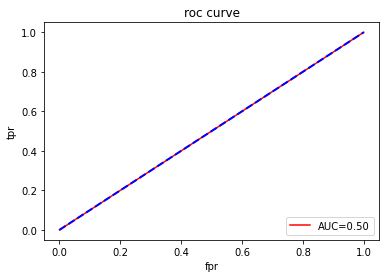

In [135]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
preds=dtc.predict_proba(X)[:,1]
fpr,tpr,thershold=roc_curve(y,preds,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,'r',label='AUC=%0.2f'% roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.legend(loc='lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')
plt.show()

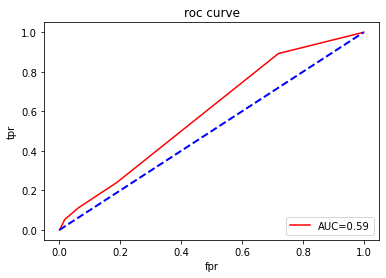

In [136]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
preds=knn.predict_proba(X)[:,1]
fpr,tpr,thershold=roc_curve(y,preds,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,'r',label='AUC=%0.2f'% roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.legend(loc='lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')
plt.show()